PyTorch Spam Accuracy: 0.5
PyTorch Spam Loss: 0.8676628470420837


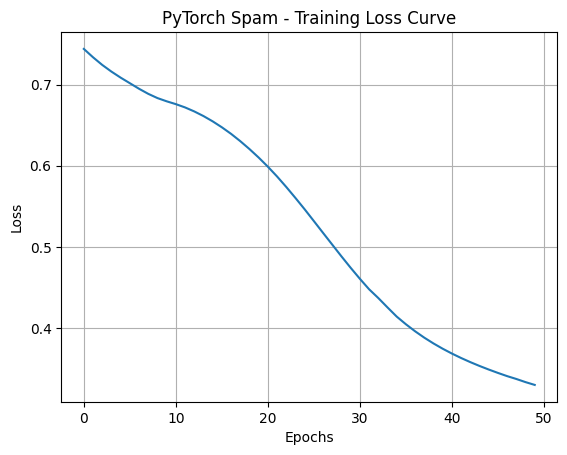

In [1]:
# ----------------------------------------------------------
# PYTORCH – Spam Classification (Accuracy + Loss + Graph)
# ----------------------------------------------------------

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Dataset
messages = [
    "Congratulations! You won a $1000 gift card.",
    "You have been selected for a lucky draw cash prize!",
    "Win money now! Claim your reward.",
    "Free entry in a weekly contest! Click here!",
    "Your OTP is 667890. Do not share with anyone.",
    "Hey, are we still meeting today?",
    "Please submit the assignment by 5 PM.",
    "Call me when you reach home.",
    "Your recharge is successful.",
    "Limited offer!!! Buy 1 get 1 free today only!",
]

labels = [1,1,1,1,0,0,0,0,0,1]

# TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(messages).toarray()
y = torch.tensor(labels, dtype=torch.float32).view(-1,1)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)

# Model
class SpamNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 8)
        self.fc2 = nn.Linear(8, 4)
        self.fc3 = nn.Linear(4, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = SpamNet()

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

loss_list = []

# Train
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    out = model(X_train)
    loss = criterion(out, y_train)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

# Test
with torch.no_grad():
    preds = (model(X_test) > 0.5).float()
    accuracy = (preds.eq(y_test).sum() / len(y_test)).item()
    test_loss = criterion(model(X_test), y_test).item()

print("PyTorch Spam Accuracy:", accuracy)
print("PyTorch Spam Loss:", test_loss)

# Loss plot
plt.plot(loss_list)
plt.title("PyTorch Spam - Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
